# Quasiestacionario
Este notebook breve ilustra la evolución del campo electromagnético en un ejemplo de la aproximación cuasiestacionaria. Consideramos un dipolo con intensidad p0 en el origen, apuntando en la dirección z, y que oscila en el tiempo como cos(omega t). Entonces, al orden más bajo el campo eléctrico es simplemente el campo de un dipolo estacionario multiplicado por cos(omega t). Usamos NumPy y Matplotlib para graficar las lineas de campo en función del tiempo, solo en la región en la que vale la aproximación cuasiestacionaria. Recuerden que cada celda a continuación debe ejecutarse en orden, apretando SHIFT+ENTER:

In [1]:
# Importamos NumPy y Matplotlib
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

In [2]:
# Definimos funciones para las componentes de los campos. Solo tomamos las soluciones estacionarias multiplicadas por cos(omega t):
def ex(x,z,t):
    return 3*p0*x*z*(x**2 + z**2)**(7/2)/(2*(x**2 + z**2)**6)*np.cos(omega*t)

def ez(x,z,t):
    return (3*p0*z**2 - p0*(x**2 + z**2))/(2*(x**2 + z**2)**(5/2))*np.cos(omega*t)

In [3]:
# Definimos valores para los parámetros del sistema
p0    = 1   # Intensidad del dipolo
c     = 1   # velocidad de la luz
omega = 2*np.pi/4

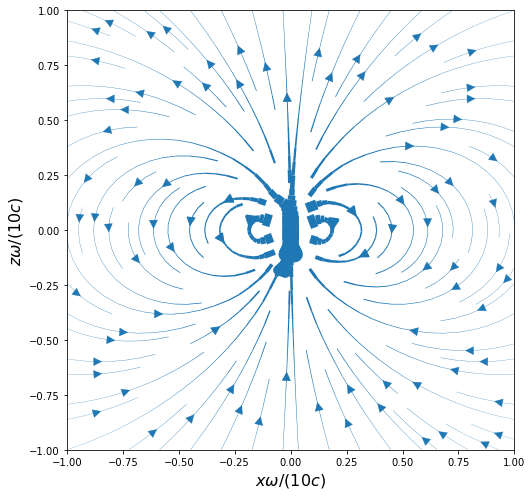

In [4]:
# Miramos 1/10 de c/omega, pues cuasiestacionario vale en longitudes mucho menores a c/omega
Lmax = c/omega/10

# Graficamos la intensidad del campo eléctrico en el plano (x,z)
xv = np.linspace(-Lmax,Lmax,20)       # generamos un vector para x con 20 puntos entre -Lmax y Lmax
zv = np.linspace(-Lmax,Lmax,20)+1e-15 # generamos un vector para z con 20 puntos entre -Lmax y Lmax, desplazado para evitar la singularidad
x, z = np.meshgrid(xv, zv)            # generamos una malla 2D con todos los valores de x y z en cada punto

# Graficamos el campo eléctrico en el plano (x,z)
plt.rcParams["figure.figsize"] = (7.5,7)
fig = plt.figure()
for t in np.linspace(0,4*np.pi/omega,32):
    plt.figure(figsize=(7.5,7))
    fx  = ex(x,z,t)
    fz  = ez(x,z,t)
    val = 4e-2*(fx**2+fz**2/p0**2)**.25
    plt.streamplot(x/Lmax,z/Lmax,fx,fz,linewidth=.15*val,arrowsize=2)
    plt.xlabel(r'$x \omega/(10 c)$',fontsize=16)
    plt.ylabel(r'$z \omega/(10 c)$',fontsize=16)
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.tight_layout()
    display.display(plt.gcf())
    display.clear_output(wait=True)
    plt.pause(0.01)
plt.show()